In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Import data from CSV
data = pd.read_csv('Final-data-with-bins-days-R1.csv', header=None, names=['Date', 'Company', 'Bin', 'Days'])
# Filter data for the specific company
company_data = data[data['Company'] == "080b998a-8625-4e84-a82f-2d124f6eb55d"]

# Sort the data by date
company_data = company_data.sort_values(by='Date')
company_data.reset_index(drop=True, inplace=True)

# Prepare the input features and targets for training and testing
X = company_data[['Bin', 'Days']].values
y_bin = company_data['Bin'].values
y_days = company_data['Days'].values

# Split data into training and testing sets chronologically
n = len(company_data)
n_half = n // 2
X_train, X_test = X[:n_half], X[n_half:]
y_bin_train, y_bin_test = y_bin[:n_half], y_bin[n_half:]
y_days_train, y_days_test = y_days[:n_half], y_days[n_half:]

# Train a RandomForestRegressor model for bins
model_bin = RandomForestRegressor(n_estimators=100, random_state=42)
model_bin.fit(X_train, y_bin_train)

# Train a RandomForestRegressor model for days
model_days = RandomForestRegressor(n_estimators=100, random_state=42)
model_days.fit(X_train, y_days_train)

# Make predictions using the testing set
y_pred_bin = model_bin.predict(X_test)
y_pred_days = model_days.predict(X_test)

# Round the predicted bins and days to the nearest integers
predicted_bins = np.round(y_pred_bin).astype(int)
predicted_days = np.round(y_pred_days).astype(int)

# Calculate the mean absolute error for bins and days
mae_bins = mean_absolute_error(y_bin_test, predicted_bins)
mae_days = mean_absolute_error(y_days_test, predicted_days)

# Calculate the mean absolute percentage error for bins and days
mape_bins = mean_absolute_percentage_error(y_bin_test, predicted_bins)
mape_days = mean_absolute_percentage_error(y_days_test, predicted_days)

print("Mean absolute error (bins): ", mae_bins)
print("Mean absolute error (days): ", mae_days)
print("Mean absolute percentage error (bins): ", mape_bins)
print("Mean absolute percentage error (days): ", mape_days)

# Create a DataFrame for the test set with predictions
test_data_with_predictions = pd.DataFrame({
    'Date': company_data.iloc[n_half:]['Date'],
    'Company': company_data.iloc[n_half:]['Company'],
    'Real Bin': y_bin_test,
    'Real Days': y_days_test,
    'Predicted Bin': predicted_bins,
    'Predicted Days': predicted_days,
    
})

#Reset the index and display the resulting DataFrame
test_data_with_predictions.reset_index(drop=True, inplace=True)
print(test_data_with_predictions)


Mean absolute error (bins):  0.2391304347826087
Mean absolute error (days):  2.1739130434782608
Mean absolute percentage error (bins):  0.1956521739130435
Mean absolute percentage error (days):  0.047666517572033835
          Date                               Company  Real Bin  Real Days  \
0   2019-03-14  080b998a-8625-4e84-a82f-2d124f6eb55d         6         25   
1   2019-04-08  080b998a-8625-4e84-a82f-2d124f6eb55d         5         17   
2   2019-05-09  080b998a-8625-4e84-a82f-2d124f6eb55d         4         23   
3   2019-07-22  080b998a-8625-4e84-a82f-2d124f6eb55d         5         52   
4   2019-08-06  080b998a-8625-4e84-a82f-2d124f6eb55d         4         11   
5   2019-09-17  080b998a-8625-4e84-a82f-2d124f6eb55d         3         30   
6   2019-10-10  080b998a-8625-4e84-a82f-2d124f6eb55d         4         17   
7   2019-10-30  080b998a-8625-4e84-a82f-2d124f6eb55d         5         14   
8   2019-12-04  080b998a-8625-4e84-a82f-2d124f6eb55d         6         25   
9   2019-12-19

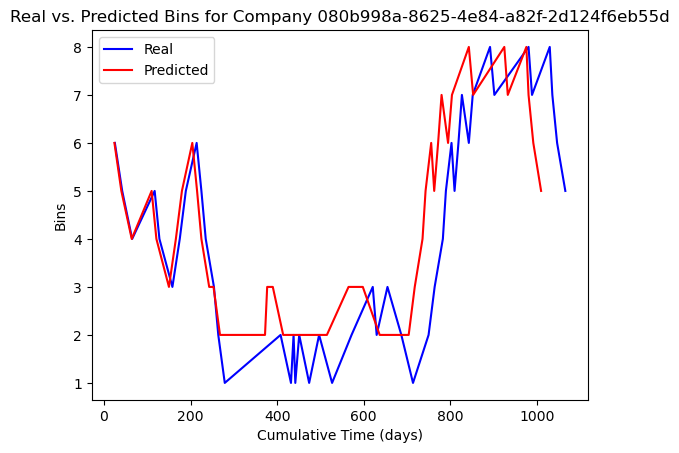

In [2]:
# Crearea graficului
fig, ax = plt.subplots()

# Calcularea timpului acumulat pentru valorile reale și prezise
cumulative_time_real = np.cumsum(y_days_test)
cumulative_time_predicted = np.cumsum(predicted_days)

# Plotează valorile reale
ax.plot(cumulative_time_real, y_bin_test, label='Real', color='blue')

# Plotează valorile prezise
ax.plot(cumulative_time_predicted, predicted_bins, label='Predicted', color='red')

# Setează etichetele și titlul pentru grafic
ax.set_xlabel('Cumulative Time (days)')
ax.set_ylabel('Bins')
ax.set_title('Real vs. Predicted Bins for Company 080b998a-8625-4e84-a82f-2d124f6eb55d')
ax.legend()

# Afișează graficul
plt.show()